# Практическая работа №4
Программная реализация рекуррентной нейронной сети

Цель: изучение архитектур рекуррентных нейронных сетей;
создание и исследование моделей рекуррентных нейронных сетей
для задачи распознавания физической активности пользователей.

Разработать различные архитектуры рекуррентных нейронных сетей
(классическая модель RNN, LSTM-модель, GRU-модель,
Bidirectional RNN). Выполнить подбор гиперпараметров данных
моделей. Выбрать наилучшую нейронную сеть по величине
точности на тестирующем множестве.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras.layers import Dense, Dropout
from itertools import product

In [64]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [65]:
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)


def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI HAR dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        )

    return np.transpose(signals_data, (1, 2, 0))

def load_y(subset):
    filename = f'UCI HAR dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

def plot_train_val_accuracy_loss(history):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')


In [66]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

X_train, X_test, Y_train, Y_test = load_data()
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

C:\Users\yormu\AppData\Local\Temp\ipykernel_5388\4115930397.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
C:\Users\yormu\AppData\Local\Temp\ipykernel_5388\4115930397.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
C:\Users\yormu\AppData\Local\Temp\ipykernel_5388\4115930397.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
C:\Users\yormu\AppData\Local\Temp\ipykernel_5388\4115930397.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future ve

In [67]:
print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [68]:
dropout_rate=0.5

def create_model_LSTM(optimizer='RMSprop', hidden_layers=2, hidden_layers_neurons = (64, 64)):
    model = Sequential()
    if hidden_layers == 1:return_sequences=False
    else:return_sequences=True
    for i in range(hidden_layers):
        if i == 0:
            model.add(LSTM(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers], input_shape=(timesteps, input_dim), return_sequences=return_sequences))
        else:
            model.add(LSTM(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers]))
        model.add(layers.BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

def create_model_RNN(optimizer='RMSprop', hidden_layers=2, hidden_layers_neurons = (64, 64)):
    model = Sequential()
    if hidden_layers == 1:return_sequences=False
    else:return_sequences=True
    for i in range(hidden_layers):
        if i == 0:
            model.add(SimpleRNN(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers], input_shape=(timesteps, input_dim), return_sequences=return_sequences))
        else:
            model.add(SimpleRNN(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers]))
        model.add(layers.BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

def create_model_GRU(optimizer='RMSprop', hidden_layers=2, hidden_layers_neurons = (64, 64)):
    model = Sequential()
    if hidden_layers == 1:return_sequences=False
    else:return_sequences=True
    for i in range(hidden_layers):
        if i == 0:
            model.add(GRU(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers], input_shape=(timesteps, input_dim), return_sequences=return_sequences))
        else:
            model.add(GRU(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers]))
        model.add(layers.BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

def create_model_Bidirectional(optimizer='RMSprop', hidden_layers=2, hidden_layers_neurons = (64, 64)):
    model = Sequential()
    if hidden_layers == 1:return_sequences=False
    else:return_sequences=True
    for i in range(hidden_layers):
        if i == 0:
            model.add(Bidirectional(SimpleRNN(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers], return_sequences=return_sequences), input_shape=(timesteps, input_dim)))
        else:
            model.add(Bidirectional(SimpleRNN(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers])))
        model.add(layers.BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [69]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

def GridSearch(build_fn, param_grid, epochs, batch_size):
    print(param_grid)
    best_loss = 1
    best_model = None
    best_history = None
    best_params = {}
    params = {}
    best_for_layernums = []
    for hidden_layers in param_grid['hidden_layers']:
        best_for_layernum = None
        hidden_layers_neurons_prod = list(product(param_grid['hidden_layers_neurons'], repeat=hidden_layers))
        for hidden_layers_neurons in hidden_layers_neurons_prod:
            for optimizer in param_grid['optimizer']:
                print(hidden_layers, hidden_layers_neurons, optimizer)
                model = build_fn(optimizer=optimizer, hidden_layers=hidden_layers, hidden_layers_neurons=hidden_layers_neurons)
                history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), callbacks=[early_stopping], batch_size=batch_size, verbose=0)
                new_loss = history.history['val_loss'][-1]
                print(new_loss)
                if new_loss < best_loss:
                    best_loss = new_loss
                    best_model = model
                    best_history = history
                    best_params["hidden_layers"] = hidden_layers
                    best_params["hidden_layers_neurons"] = hidden_layers_neurons
                    best_params["optimizer"] = optimizer

        best_for_layernums.append(best_for_layernum)
    return best_model, best_history, best_params

In [70]:
hidden_layers = [1, 2]
neurons = [64, 128]
optimizers = ['RMSprop', 'sgd']
param_grid = dict(optimizer=optimizers, hidden_layers=hidden_layers, hidden_layers_neurons=neurons)

In [71]:
best_model_RNN, best_history_RNN, best_params_RNN = GridSearch(create_model_RNN, param_grid, 10, 64)
print(best_params_RNN)

{'optimizer': ['RMSprop', 'sgd'], 'hidden_layers': [1, 2], 'hidden_layers_neurons': [64, 128]}
1 (64,) RMSprop
0.45179983973503113
1 (64,) sgd
1.989135503768921
1 (128,) RMSprop
1.5997309684753418
1 (128,) sgd
1.7412093877792358
2 (64, 64) RMSprop
2.8876917362213135
2 (64, 64) sgd
1.3639247417449951
2 (64, 128) RMSprop
3.79488205909729
2 (64, 128) sgd
2.320590019226074
2 (128, 64) RMSprop
5.487215995788574
2 (128, 64) sgd
2.0416831970214844
2 (128, 128) RMSprop
2.1373226642608643
2 (128, 128) sgd
4.324316024780273
{'hidden_layers': 1, 'hidden_layers_neurons': (64,), 'optimizer': 'RMSprop'}


In [72]:
best_model_GRU, best_history_GRU, best_params_GRU = GridSearch(create_model_GRU, param_grid, 10, 64)
print(best_params_GRU)

{'optimizer': ['RMSprop', 'sgd'], 'hidden_layers': [1, 2], 'hidden_layers_neurons': [64, 128]}
1 (64,) RMSprop
0.7031581997871399
1 (64,) sgd
1.1891183853149414
1 (128,) RMSprop
0.3950747847557068
1 (128,) sgd
1.1715892553329468
2 (64, 64) RMSprop
0.31655776500701904
2 (64, 64) sgd
1.1632503271102905
2 (64, 128) RMSprop
0.2775280177593231
2 (64, 128) sgd
1.1570004224777222
2 (128, 64) RMSprop
0.354174941778183
2 (128, 64) sgd
0.7976554036140442
2 (128, 128) RMSprop
0.21056713163852692
2 (128, 128) sgd
0.7886146306991577
{'hidden_layers': 2, 'hidden_layers_neurons': (128, 128), 'optimizer': 'RMSprop'}


In [73]:
best_model_LSTM, best_history_LSTM, best_params_LSTM = GridSearch(create_model_LSTM, param_grid, 10, 64)
print(best_params_LSTM)

{'optimizer': ['RMSprop', 'sgd'], 'hidden_layers': [1, 2], 'hidden_layers_neurons': [64, 128]}
1 (64,) RMSprop
0.5111595392227173
1 (64,) sgd
1.2360210418701172
1 (128,) RMSprop
0.5094346404075623
1 (128,) sgd
1.7593352794647217
2 (64, 64) RMSprop
0.3029124140739441
2 (64, 64) sgd
0.5127955675125122
2 (64, 128) RMSprop
0.3886715769767761
2 (64, 128) sgd
0.42420876026153564
2 (128, 64) RMSprop
0.34317654371261597
2 (128, 64) sgd
0.3599109649658203
2 (128, 128) RMSprop
0.33982178568840027
2 (128, 128) sgd
0.32357731461524963
{'hidden_layers': 2, 'hidden_layers_neurons': (64, 64), 'optimizer': 'RMSprop'}


In [74]:
best_model_Bidirectional, best_history_Bidirectional, best_params_Bidirectional = GridSearch(create_model_Bidirectional, param_grid, 10, 64)
print(best_params_Bidirectional)

{'optimizer': ['RMSprop', 'sgd'], 'hidden_layers': [1, 2], 'hidden_layers_neurons': [64, 128]}
1 (64,) RMSprop
0.7467136979103088
1 (64,) sgd
1.1104885339736938
1 (128,) RMSprop
3.3822431564331055
1 (128,) sgd
3.3877811431884766
2 (64, 64) RMSprop
0.35257670283317566
2 (64, 64) sgd
2.9217898845672607
2 (64, 128) RMSprop
0.7817341685295105
2 (64, 128) sgd
1.3125585317611694
2 (128, 64) RMSprop
1.6207126379013062
2 (128, 64) sgd
1.909525752067566
2 (128, 128) RMSprop
0.7204468846321106
2 (128, 128) sgd
1.4709913730621338
{'hidden_layers': 2, 'hidden_layers_neurons': (64, 64), 'optimizer': 'RMSprop'}


Model RNN: {'hidden_layers': 1, 'hidden_layers_neurons': (64,), 'optimizer': 'RMSprop'}
Test Loss : 0.4518
Test Accuracy : 0.8524


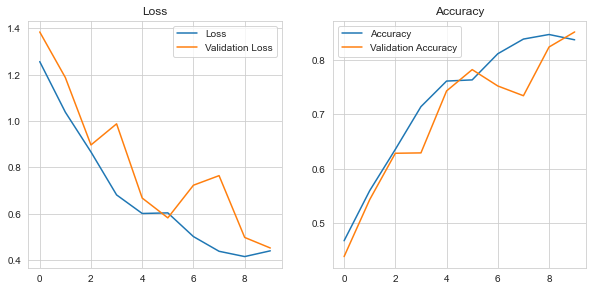

In [75]:
plot_train_val_accuracy_loss(best_history_RNN)
score = best_model_RNN.evaluate(X_test, Y_test, verbose=0)
print("Model RNN:", best_params_RNN)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Model GRU: {'hidden_layers': 2, 'hidden_layers_neurons': (128, 128), 'optimizer': 'RMSprop'}
Test Loss : 0.2106
Test Accuracy : 0.9348


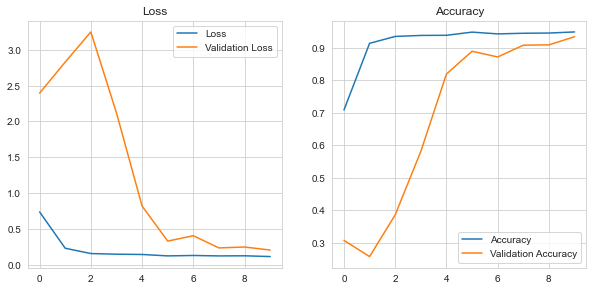

In [76]:
plot_train_val_accuracy_loss(best_history_GRU)
score = best_model_GRU.evaluate(X_test, Y_test, verbose=0)
print("Model GRU:", best_params_GRU)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Model LSTM: {'hidden_layers': 2, 'hidden_layers_neurons': (64, 64), 'optimizer': 'RMSprop'}
Test Loss : 0.3029
Test Accuracy : 0.9036


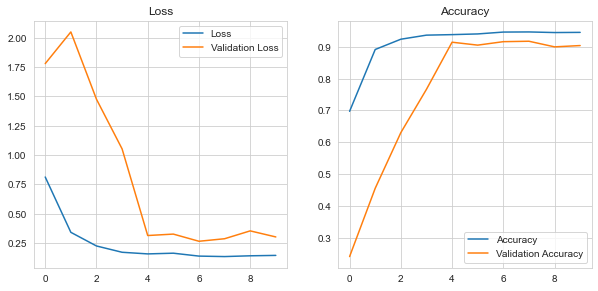

In [77]:
plot_train_val_accuracy_loss(best_history_LSTM)
score = best_model_LSTM.evaluate(X_test, Y_test, verbose=0)
print("Model LSTM:", best_params_LSTM)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Model Bidirectional: {'hidden_layers': 2, 'hidden_layers_neurons': (64, 64), 'optimizer': 'RMSprop'}
Test Loss : 0.3526
Test Accuracy : 0.8772


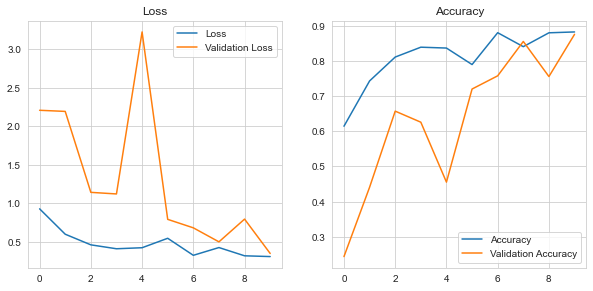

In [78]:
plot_train_val_accuracy_loss(best_history_Bidirectional)
score = best_model_Bidirectional.evaluate(X_test, Y_test, verbose=0)
print("Model Bidirectional:", best_params_Bidirectional)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))